## Adatok beolvasása

Importok:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import hashlib
import string
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
#from scipy.stats import randint as sp_randint
from collections import Counter
from mpl_toolkits.basemap import Basemap
from folium.plugins import HeatMap
import folium
from geopy.geocoders import Nominatim
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb

In [2]:
def load_data(path):
 csv_path = os.path.join(path, "zomato.csv")
 return pd.read_csv(csv_path)

zomato = load_data("datasets")

Adatok összekeverése annak érdekében, hogy esetleges mintákat elimináljuk a kezdeti adatbázisban.

In [3]:
zomato = shuffle(zomato)
zomato.reset_index(inplace=True, drop=True)

In [4]:
backup_zomato = zomato.copy()

In [5]:
zomato

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/angel-restaur...,"1st Cross, Bilekahalli, Near IIMB College, Ban...",Angel Restaurant,Yes,No,2.8/5,165,+91 9035699847\r\n+91 9880714970,Bannerghatta Road,Quick Bites,NaN,"Kerala, South Indian, North Indian",450,"[('Rated 1.0', 'RATED\n I cannot say a word a...",[],Dine-out,Bannerghatta Road
1,https://www.zomato.com/bangalore/berrylicious-...,"4/1, Brunton Road, MG Road, Bangalore",Berrylicious Cafe,Yes,No,4.1/5,125,080 49652468,MG Road,"Casual Dining, Cafe","Waffles, Sandwiches, Nachos, Burgers, Chicken ...","Continental, Cafe, Desserts, Pizza, North Indi...",900,"[('Rated 3.0', ""RATED\n One of the healthy fo...","['Paneer makhni Combo', 'Kadai Chicken Combo',...",Dine-out,Church Street
2,https://www.zomato.com/bangalore/chutney-chang...,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...",Chutney Chang,Yes,Yes,4.1/5,2342,080 22443007\r\n+91 9901967373,Jayanagar,Casual Dining,"Veg Momos, Brownie Chocolate, Palak Chaat, Mut...","North Indian, Chinese, BBQ","1,500","[('Rated 4.0', 'RATED\n Great place for team ...",[],Buffet,Jayanagar
3,https://www.zomato.com/bangalore/rayalaseema-c...,"88, 1st Floor, VIMS Hospital Building, Outer R...",Rayalaseema Chefs,Yes,Yes,3.9 /5,231,+91 7026376666\n+91 7026386666,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Had Good experience w...","['Mutton Keema Fry', 'Gutti Vankaya Kura', 'Ra...",Delivery,Marathahalli
4,https://www.zomato.com/bangalore/godavari-deli...,"2039, Shanthipura Road, Doddanagamangala, Phas...",Godavari Delights,Yes,No,3.5/5,146,+91 9739888849\r\n+91 9739888879,Electronic City,Casual Dining,NaN,"Andhra, Biryani",700,"[('Rated 1.0', 'RATED\n 90 percent of egg bir...","['Andhra Meal', 'Chicken Meal', 'Hyderabad Chi...",Delivery,Electronic City
5,https://www.zomato.com/bangalore/chaithanya-xp...,"615, 2nd Main Road, Binnamangala, Hoysala Naga...",Chaithanya Xpress,No,No,3.6/5,12,NaN,Indiranagar,Quick Bites,NaN,"South Indian, North Indian",300,"[('Rated 2.0', 'RATED\n Chaithanya Xpress, In...",[],Dine-out,Indiranagar
6,https://www.zomato.com/bangalore/aagaman-veg-i...,"545, 3rd Floor, CMH Road, Indiranagar, Bangalore",Aagaman Veg,Yes,No,4.0/5,558,080 40956662\r\n080 40926663,Indiranagar,Casual Dining,"Jalebi, Lunch Buffet, Dal Kichadi, Panneer But...","North Indian, Chinese, South Indian",900,"[('Rated 3.0', ""RATED\n Aagaman veg is a veg ...",[],Delivery,Frazer Town
7,https://www.zomato.com/bangalore/make-it-roll-...,"445, Shop 1, 5th Main Road, Sector 6, HSR, Ban...",Make It Roll,Yes,No,3.8 /5,43,080 48653336\r\n+91 6362486312,HSR,Quick Bites,NaN,"Rolls, Salad, Sandwich",400,"[('Rated 4.0', ""RATED\n We've ordered bowls f...","['Veg Pesto Sandwich', 'Veg Cheese Sandwich', ...",Delivery,Koramangala 6th Block
8,https://www.zomato.com/bangalore/the-pavillion...,"Quality Inn - Shravanthi, 60, 13th Cross, 2nd ...",The Pavillion,No,No,2.7/5,43,080 42456060\r\n+91 9900014132,JP Nagar,Casual Dining,NaN,"North Indian, Continental, South Indian, Chinese","1,000","[('Rated 3.0', 'RATED\n Had been here with co...",[],Buffet,BTM
9,https://www.zomato.com/bangalore/the-ganache-f...,"156A, 43rd Cross, 2nd Main, Jayanagar 8th Bloc...",The Ganache Factory,No,No,4.2/5,128,+91 8971485815,Jayanagar,Delivery,"Red Velvet, Lime Pie, Nutella Cheesecake, Blue...","Desserts, Bakery",400,"[('Rated 5.0', 'RATED\n Ordered d chocolate t...",[],Delivery,Jayanagar


In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [7]:
print(len(set(zomato['url'])))
print(len(set(zomato['name'])))
print(len(set(zomato['phone'])))
print(zomato['rate'].value_counts())

51717
8792
14927
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1/5     1474
4.1 /5    1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
          ... 
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
4.9 /5      30
2.4 /5      30
2.3/5       28
4.9/5       25
2.3 /5      23
4.8/5       23
2.2/5       19
2.1 /5      13
2.1/5       11
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64


## A feleslegesnek vélt attribútumok eldobása

In [8]:
zomato = zomato.drop(['url',  'phone', 'location', 'rest_type', 'reviews_list', 'menu_item'], axis=1)

## Az adatbázis tanító és teszt szettekre felbontásáért felelős függvények

In [9]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
 return data.loc[~in_test_set], data.loc[in_test_set]

def test_set_check(identifier, test_ratio, hash):
 return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


## Szöveges oszlopok átalakítására való függvények

In [10]:
def yesNoConverter(column):
    encoder=LabelEncoder()
    column_converted=encoder.fit_transform(column)
    return column_converted

In [11]:
def label_factorize(df):
    for col in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes', 'listed_in(type)', 'listed_in(city)'])]:
        df[col] = df[col].factorize()[0]
    return df

In [12]:
def one_hotTransformer(zomato_encoded):
    encoder = OneHotEncoder(categories='auto')
    zomato_cat_1hot = encoder.fit_transform(zomato_encoded.reshape(-1,1))
    return zomato_cat_1hot

In [13]:
type_labels = list()
city_labels = list()

def labelEncoder(column, city):
    global type_labels
    global city_labels
    encoder = LabelEncoder()
    zomato_cat_encoded = encoder.fit_transform(column)
    if city:
        city_labels = list(encoder.classes_)
    else:
        type_labels = list(encoder.classes_)
    
    return zomato_cat_encoded

## A 'rate' oszlop megtisztítására való függvény

Eredetileg '4.1 / 5', 'NEW', '-', '3.5/5' formákban találhatóak az adatok.
Ezekből csak az első tag kellene, a szöveges információkat pedig nan értékekkel helyettesítjük.

In [14]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def cleanRates(data):
    if(isinstance(data, float)):
        return data
    else:
        cleanData = data.translate({ord(c): None for c in string.whitespace})
        vote = cleanData.split('/')
        if (isfloat(vote[0])):
            return float(vote[0])
        else:
            return np.nan

## Medián kiszámítására használatos függvény

Minden olyan adatot, amit később fel kell használni a teszt szettel való műveletek során, egy-egy globális dictionary-be mentjük el.
Az egyes oszlopokhoz tartozó értékek az oszlop neve alapján érthetőek el (ez a kulcs).

In [15]:
def calculateMedianByColumnName(column, column_name):
    items_cleaned = []
    numpy_array = np.array(column)
    for x in numpy_array:
        if not np.isnan(x):
            items_cleaned.append(x)
            
    global median      
    median[column_name] = np.median(items_cleaned)
    return median[column_name]

In [16]:
# csak inicializálás, hogy meglegyenek globálisan
median = dict()

def replaceNanByMedian(column, column_name, training):
    if training:
        global median
        median[column_name] = calculateMedianByColumnName(column, column_name)
        
    column_cleaned = []
    numpy_array = np.array(column)
    for x in numpy_array:
        if np.isnan(x):
            column_cleaned.append(median[column_name])
        else:
            column_cleaned.append(x)
    return column_cleaned

## Standard és MinMax skálázó függvények

In [17]:
# csak inicializálás, hogy meglegyenek globálisan
mean = dict()
variance = dict()

def standardScaler(column, column_name, training):
    if training:
        global mean
        mean[column_name] = np.mean(column)
        global variance
        variance[column_name] = np.var(column)
        
    standardizedCol = []
    for x in column:
        standardizedCol.append((x - mean[column_name]) / variance[column_name])
   
    return standardizedCol

In [18]:
# csak inicializálás, hogy meglegyenek globálisan
min_value = dict()
max_value = dict()

def Normalize(column, column_name, training):
    if training:
        global min_value
        min_value[column_name] = float(column.min())
        global max_value
        max_value[column_name] = float(column.max())
        
    column_substract = []
    for x in column:
        column_substract.append((float(x)-min_value[column_name])/(max_value[column_name]-min_value[column_name]))
    return column_substract

### Apróbb függvény, ami a tizedesvesszőt tartalmazó számadatokból kiveszi a tizedesvesszőt. (Tizedesvesszővel string formátumban vannak)

In [19]:
def ConvertFromMoneyToString(column):
    column_converted = []
    for x in column:
        if not isfloat(x):
            x = x.replace(",", "")
            column_converted.append(float(x))
        else:
            column_converted.append(float(x))
    return column_converted

## Az eredmények megjelenítéséért felelős függvények

In [20]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("\n")

In [21]:
def displayLinRegPredictions(lin_reg, train_set_ready_df, labels_ready):
    some_data = train_set_ready_df.iloc[:5]
    #some_data = train_set.iloc[:5]
    some_labels = pd.DataFrame(data=labels_ready).iloc[:5]

    print("Predictions:\t", lin_reg.predict(train_set_ready_df.iloc[:5]))
    print("Labels:\t\t", some_labels)
    print("\n")

In [22]:
statistic_table = pd.DataFrame()

def printToStatistics(name, rmse, details, pg, mean='Nan', sd='NaN'):
    global statistic_table 
    statistic_table = statistic_table.append({'name' : name , 
                                              'rmse' : rmse , 
                                              'details' : details,
                                              'mean' : mean,
                                              'standard deviation' : sd,
                                              'purging' : pg
                                             } , ignore_index=True)

In [23]:
test_statistic_table = pd.DataFrame()

def printToTestStatistics(name, score):
    global test_statistic_table 
    test_statistic_table = test_statistic_table.append({'name' : name , 
                                              'score' : score
                                             } , ignore_index=True)

## Saját pipeline egy függvény formájában

A szükséges helyeken a hiányzó értékeket -1-ekkel töltjük fel, mert ez adta a legjobb eredményt. 
A paraméterben megadható skálázóval skálázzuk a megfelelő attribútumokat az adat "megtisztítása" után (pl. string --> float).
Némely paraméterre OneHot kódolót is használunk, mert így sikerült a legjobb eredményt elérni.
Miután minden paramétert feldolgoztunk, egy mátrixot rakunk össze a paraméterekből.

In [24]:
# csak hogy globális legyen
zomato_labels =  []

def runPipeline(dataset, training, scaler):
    dataset_ready = dataset.copy()
    
    dataset_ready = label_factorize(dataset_ready)
    #dataset_ready = dataset_ready.drop(['rate'], axis=1).fillna(-1) #filling nan values by -1
    dataset_ready['name'] = dataset_ready['name'].fillna(-1)
    dataset_ready['cuisines'] = dataset_ready['cuisines'].fillna(-1)
    dataset_ready['dish_liked'] = dataset_ready['dish_liked'].fillna(-1)
    dataset_ready['address'] = dataset_ready['address'].fillna(-1)
    
    dataset_ready['online_order'] = yesNoConverter(dataset_ready['online_order'])
    dataset_ready['book_table'] = yesNoConverter(dataset_ready['book_table'])
    
    dataset_type_encoded = labelEncoder(dataset_ready['listed_in(type)'], False)
    dataset_type_encoded_oneHot = one_hotTransformer(dataset_type_encoded)
        
    dataset_city_encoded = labelEncoder(dataset_ready['listed_in(city)'], True)
    dataset_city_encoded_oneHot = one_hotTransformer(dataset_city_encoded)
    
    dataset_ready['approx_cost(for two people)'] = ConvertFromMoneyToString(dataset_ready['approx_cost(for two people)'])
    dataset_ready['approx_cost(for two people)'] = replaceNanByMedian(dataset_ready['approx_cost(for two people)'], "approx_cost(for two people)", training)
    dataset_ready['approx_cost(for two people)'] = scaler(dataset_ready['approx_cost(for two people)'], "approx_cost(for two people)", training)
    dataset_ready['name'] = scaler(dataset_ready['name'], "name", training)
    dataset_ready['address'] = scaler(dataset_ready['address'], "address", training)
    dataset_ready['dish_liked'] = scaler(dataset_ready['dish_liked'], "dish_liked", training)
    dataset_ready['cuisines'] = scaler(dataset_ready['cuisines'], "cuisines", training)
    dataset_ready['votes'] = scaler(dataset_ready['votes'], "votes", training)
    dataset_num = dataset_ready.drop(['listed_in(type)', 'listed_in(city)', 'rate'], axis=1)
    dataset_ready = np.concatenate((np.concatenate((dataset_num, dataset_type_encoded_oneHot.toarray()), axis=1), dataset_city_encoded_oneHot.toarray()), axis=1)
    return dataset_ready

## Az adat betanítására, majd a betanított adatbázison modelleken való futtatására való függvény

Nem ad vissza adatot, futás közben az összes modellel produkált eredményt sorban kiírja.

In [25]:
def trainDataWithGivenScalerAndRunAllModels(dataset, labels, scaler, details, purging):
    dataset_ready = runPipeline(dataset, True, scaler)
    dataset_ready_df = pd.DataFrame(dataset_ready)
    
    # Lineáris regresszió    
    lin_reg = LinearRegression(n_jobs = -1)
    lin_reg.fit(dataset_ready, labels)
    train_set_predictions = lin_reg.predict(dataset_ready_df)
    lin_mse = mean_squared_error(labels, train_set_predictions)
    lin_rmse = np.sqrt(lin_mse)
    printToStatistics('LinearRegression', lin_rmse, details, purging, lin_rmse)
    print("Linear Regression with", details)
    displayLinRegPredictions(lin_reg, dataset_ready_df, labels)
    
    # Döntési fa
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(dataset_ready, labels)
    train_set_predictions = tree_reg.predict(dataset_ready_df)
    tree_mse = mean_squared_error(labels, train_set_predictions)
    tree_rmse = np.sqrt(tree_mse)
    decision_tree_scores = cross_val_score(tree_reg, dataset_ready_df, labels, scoring="neg_mean_squared_error", cv=10)
    tree_rmse_scores = np.sqrt(-decision_tree_scores)
    printToStatistics('DecisionTreeRegressor', tree_rmse, details, purging, tree_rmse_scores.mean(), tree_rmse_scores.std())
    print("Decision Tree with", details)
    display_scores(tree_rmse_scores)
    
    # Random forest
    forest_reg = RandomForestRegressor(10, n_jobs = -1)
    forest_reg.fit(dataset_ready_df, pd.DataFrame(data=labels).values.ravel())
    train_set_predictions = forest_reg.predict(dataset_ready_df)
    forest_mse = mean_squared_error(labels, train_set_predictions)
    forest_rmse = np.sqrt(forest_mse)
    forest_scores = cross_val_score(forest_reg, dataset_ready_df, pd.DataFrame(data=labels).values.ravel(), scoring="neg_mean_squared_error", cv=10)
    forest_rmse_scores = np.sqrt(-forest_scores)
    printToStatistics('RandomForestRegressor', forest_rmse, details, purging, forest_rmse_scores.mean(), forest_rmse_scores.std())
    print("Random forest with", details)
    display_scores(forest_rmse_scores)

## Vizualizáló függvények

Attribútumok fontosságát vizualizáló függvény

In [26]:
def plot_importances(model, cols):
    plt.figure(figsize=(12,6))
    f_imp = pd.Series(model.feature_importances_, index=cols).sort_values(ascending=True)
    f_imp.plot(kind='barh')

Az éttermeket térképen elhelyező vizualizáció alapjának generálását végző függvény.

In [27]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

## Az adatbázis kezdeti feldolgozása

Cél attribútum üres értéket tartalmazó soroait eldobjuk (ehhez előbb szükséges az értékelések átalakítása nekünk megfelelő (4.1/5 --> 4.1) formába).
Majd tanító és teszt szettekre bontása.

In [28]:
#MAIN
dataset = zomato.copy()
cleaned_rate_labels = []
        
dataset = dataset.loc[dataset['rate'] !='NEW']
dataset = dataset.loc[dataset['rate'] !='-'].reset_index(drop=True)

for n in dataset['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
dataset['rate'] = cleaned_rate_labels
dataset = dataset.drop(dataset[np.isnan(dataset['rate'])].index)

dataset = dataset.reset_index()

train_set, test_set = split_train_test_by_id(dataset, 0.2, "index")

train_labels = train_set['rate']
train_set = train_set.drop('index', axis=1)
test_labels = test_set['rate']
test_set = test_set.drop('index', axis=1)

In [29]:
train_labels

0        2.8
1        4.1
2        4.1
3        3.9
6        4.0
7        3.8
8        2.7
9        4.2
10       3.6
12       3.9
13       3.2
14       3.9
15       3.6
16       2.6
17       3.4
18       3.5
19       3.6
21       3.8
22       3.8
23       3.6
24       3.1
25       3.3
26       3.3
27       3.9
28       3.4
29       3.5
32       3.8
33       3.2
34       3.9
35       3.7
        ... 
41627    3.1
41628    3.7
41629    3.4
41630    3.5
41632    4.5
41633    3.1
41635    3.9
41636    4.0
41637    3.9
41638    3.3
41639    3.9
41640    4.1
41641    3.5
41642    3.9
41643    3.9
41644    4.2
41645    4.3
41646    3.5
41647    3.3
41648    3.1
41649    3.4
41651    3.2
41652    4.3
41653    2.3
41657    3.7
41658    3.5
41659    3.7
41660    4.2
41663    3.2
41664    3.4
Name: rate, Length: 33093, dtype: float64

In [30]:
dataset.shape

(41665, 12)

41665 darab adatsorunk marad. A többiben hiányos volt a 'rate' oszlop értéke.

## A modellek kipróbálása mindkét skálázóval

Meghívja a runPipeline()-t, majd egyesével futtatja a feldolgozott adathalmazt a modelleken.

In [31]:
print("Running Models with MinMax")
trainDataWithGivenScalerAndRunAllModels(train_set, train_labels, Normalize, "MinMaxNorm with Basic Data", "No")

print("Running Models with StandardScaler")
trainDataWithGivenScalerAndRunAllModels(train_set, train_labels, standardScaler, "StandardScaler with Basic Data", "No")

Running Models with MinMax
Linear Regression with MinMaxNorm with Basic Data
Predictions:	 [3.53271484 3.69520569 4.23396301 3.81282043 3.75106812]
Labels:		    rate
0   2.8
1   4.1
2   4.1
3   3.9
6   4.0


Decision Tree with MinMaxNorm with Basic Data
Scores: [0.19005485 0.18917854 0.18715552 0.18118678 0.2065635  0.19724607
 0.19590859 0.20499947 0.18303707 0.19915961]
Mean: 0.19344900048327573
Standard deviation: 0.008286236243798319


Random forest with MinMaxNorm with Basic Data
Scores: [0.16211433 0.16661795 0.15631607 0.16479554 0.16422423 0.15601305
 0.16741064 0.1648664  0.16396557 0.16019018]
Mean: 0.16265139700342765
Standard deviation: 0.0037767500914791543


Running Models with StandardScaler
Linear Regression with StandardScaler with Basic Data
Predictions:	 [3.53125    3.69335938 4.23242188 3.81445312 3.75244141]
Labels:		    rate
0   2.8
1   4.1
2   4.1
3   3.9
6   4.0


Decision Tree with StandardScaler with Basic Data
Scores: [0.19013431 0.19554711 0.18873085 0.18210

A modellek által elért rmse- és mean-értékek ábrázolva. Mindegyikből 2 van, mert a két különböző skálázóval közel azonos hiba-értékeket értek el a modellek.

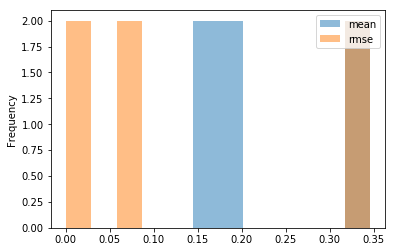

In [32]:
%matplotlib inline
ax = statistic_table.plot.hist(bins=12, alpha=0.5)

## A 'votes' oszlopból a kiugró értékek helyettesítése az általunk megadott maximum értékkel, majd a modellek ismételt futtatása a 'purgált' adatbázissal

In [33]:
#PURGÁLÁS
zomato_with_id = zomato.reset_index()
purged_dataset = dataset.copy()
#purged_dataset = dataset.drop(dataset[dataset["votes"] > 5000].index)
purged_dataset["votes"].where(purged_dataset["votes"] < 5000, 5000, inplace=True)
print(purged_dataset.shape)
purged_dataset = purged_dataset.reset_index()

second_train_set, second_test_set = split_train_test_by_id(purged_dataset, 0.2, "index")
second_train_labels = second_train_set['rate']
second_train_set = second_train_set.drop('index', axis=1)
second_test_labels = second_test_set['rate']
second_test_set = second_test_set.drop('index', axis=1)

print("Running Models with MinMax")
trainDataWithGivenScalerAndRunAllModels(second_train_set, second_train_labels,  Normalize, "MinMaxNorm with Purged Data", "Yes")

print("Running Models with StandardScaler")
trainDataWithGivenScalerAndRunAllModels(second_train_set, second_train_labels, standardScaler, "StandardScaler  with Purged Data", "Yes")

(41665, 12)
Running Models with MinMax
Linear Regression with MinMaxNorm with Purged Data
Predictions:	 [3.53577396 3.69087955 4.3073011  3.79259885 3.76860583]
Labels:		    rate
0   2.8
1   4.1
2   4.1
3   3.9
6   4.0


Decision Tree with MinMaxNorm with Purged Data
Scores: [0.23163676 0.21259439 0.1992357  0.19404087 0.21455077 0.20172271
 0.19657847 0.2182169  0.1901392  0.2246585 ]
Mean: 0.20833742744193712
Standard deviation: 0.013281580312500941


Random forest with MinMaxNorm with Purged Data
Scores: [0.17774553 0.18126052 0.16636872 0.16998844 0.17176945 0.1701894
 0.17055338 0.17561789 0.16770994 0.19163285]
Mean: 0.1742836128925344
Standard deviation: 0.007243921281682843


Running Models with StandardScaler
Linear Regression with StandardScaler  with Purged Data
Predictions:	 [3.53577396 3.69087955 4.3073011  3.79259885 3.76860583]
Labels:		    rate
0   2.8
1   4.1
2   4.1
3   3.9
6   4.0


Decision Tree with StandardScaler  with Purged Data
Scores: [0.22938246 0.21888898 0.

Látható, hogy a purgált adatbázison (minden, 5000 szavazatnál többel rendelkező adatsorban 5000-re cseréltük a szavazatszámot) minden modell, bármely skálázót is alkalmaztuk, rosszabb eredményt ért el.

A purgálás után során úgy tűnik, negatív módon torzítjuk az adatot, mely az eredmények romlásához vezetett.

## Feldolgozott (fit hívás) adatbázisok elmentése későbbi használatra

In [34]:
train_set_ready_with_minmax = runPipeline(train_set, True, Normalize)

train_set_ready_with_standard_scaler = runPipeline(train_set, True, standardScaler)

In [35]:
print(train_set_ready_with_minmax.shape)
print(train_set_ready_with_minmax)

(33093, 45)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.17508813e-04 1.54679041e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.35017626e-04 3.09358082e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.96474736e-02 1.25290023e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.68390129e-01 8.04640371e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.86251469e-01 5.35344161e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


## Korrelációs mátrix vizsgálata

In [36]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)'] + type_labels + city_labels + ['rate']
basic_data_for_corr_matrix_df = pd.DataFrame(train_set_ready_with_standard_scaler)
train_labels = train_labels.reset_index(drop=True)
basic_data_for_corr_matrix_df['rate'] = train_labels
basic_data_for_corr_matrix_df.columns = attributes
corr_matrix = basic_data_for_corr_matrix_df.corr()
corr_matrix["rate"].sort_values(ascending=False)

rate                           1.000000
votes                          0.435721
book_table                     0.425772
approx_cost(for two people)    0.384208
dish_liked                     0.346207
cuisines                       0.136078
Drinks & nightlife             0.115935
Buffet                         0.092140
Pubs and bars                  0.090828
Cafes                          0.069057
Desserts                       0.048628
MG Road                        0.043511
Church Street                  0.042631
Brigade Road                   0.039795
Residency Road                 0.038154
Lavelle Road                   0.036908
Koramangala 4th Block          0.034276
Koramangala 6th Block          0.033303
Koramangala 5th Block          0.032871
Koramangala 7th Block          0.030094
Indiranagar                    0.019028
BTM                            0.006944
Old Airport Road               0.006904
Malleshwaram                   0.003569
Basavanagudi                   0.002910


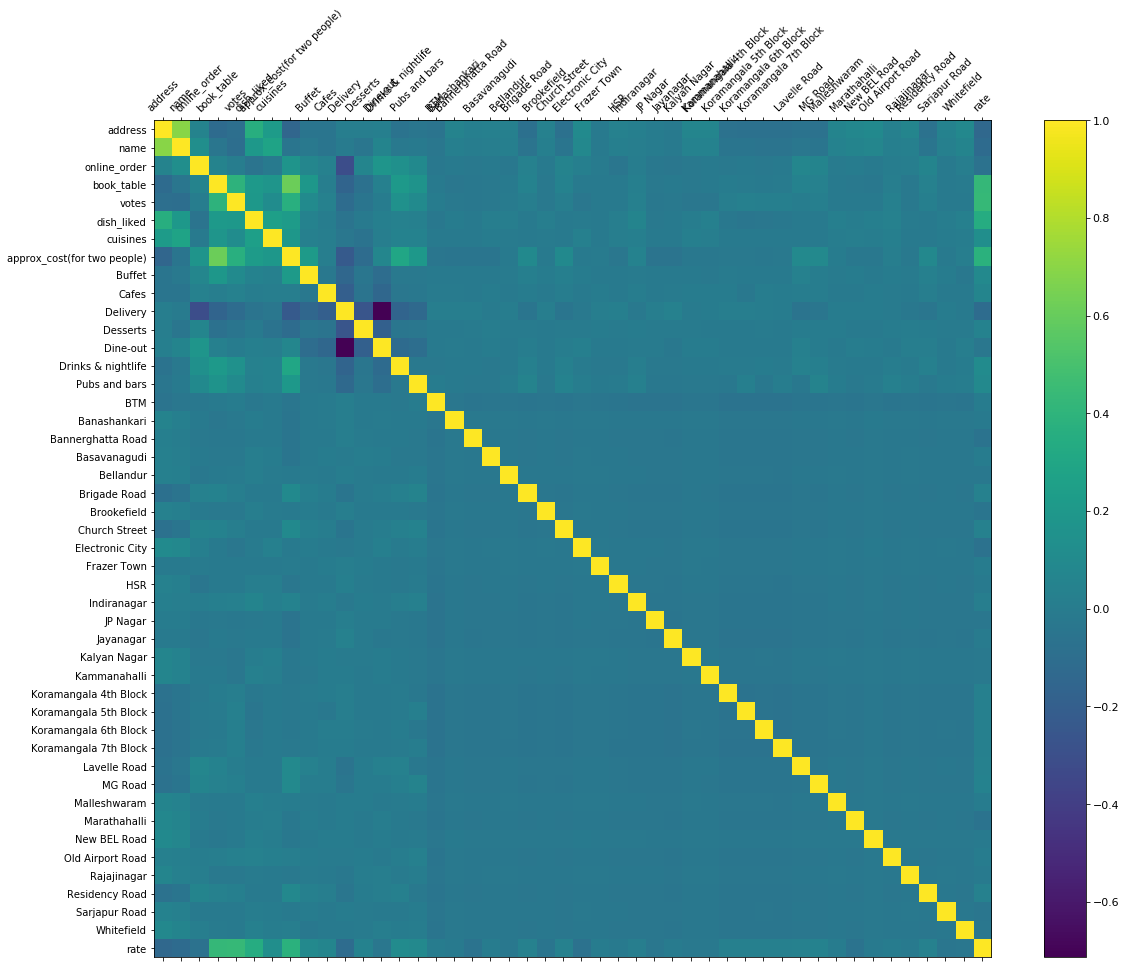

In [37]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(basic_data_for_corr_matrix_df.shape[1]), basic_data_for_corr_matrix_df.columns, fontsize=10, rotation=45)
plt.yticks(range(basic_data_for_corr_matrix_df.shape[1]), basic_data_for_corr_matrix_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)

In [38]:
imprtant_attributes = corr_matrix["rate"].sort_values(ascending=False)[:10]
imprtant_attributes = imprtant_attributes.append(corr_matrix["rate"].sort_values(ascending=False)[-7:])
columns_to_keep = imprtant_attributes.index
corr_matrix = corr_matrix.drop(columns=corr_matrix.columns.difference(columns_to_keep))
corr_matrix = corr_matrix.drop(index=corr_matrix.index.difference(columns_to_keep))

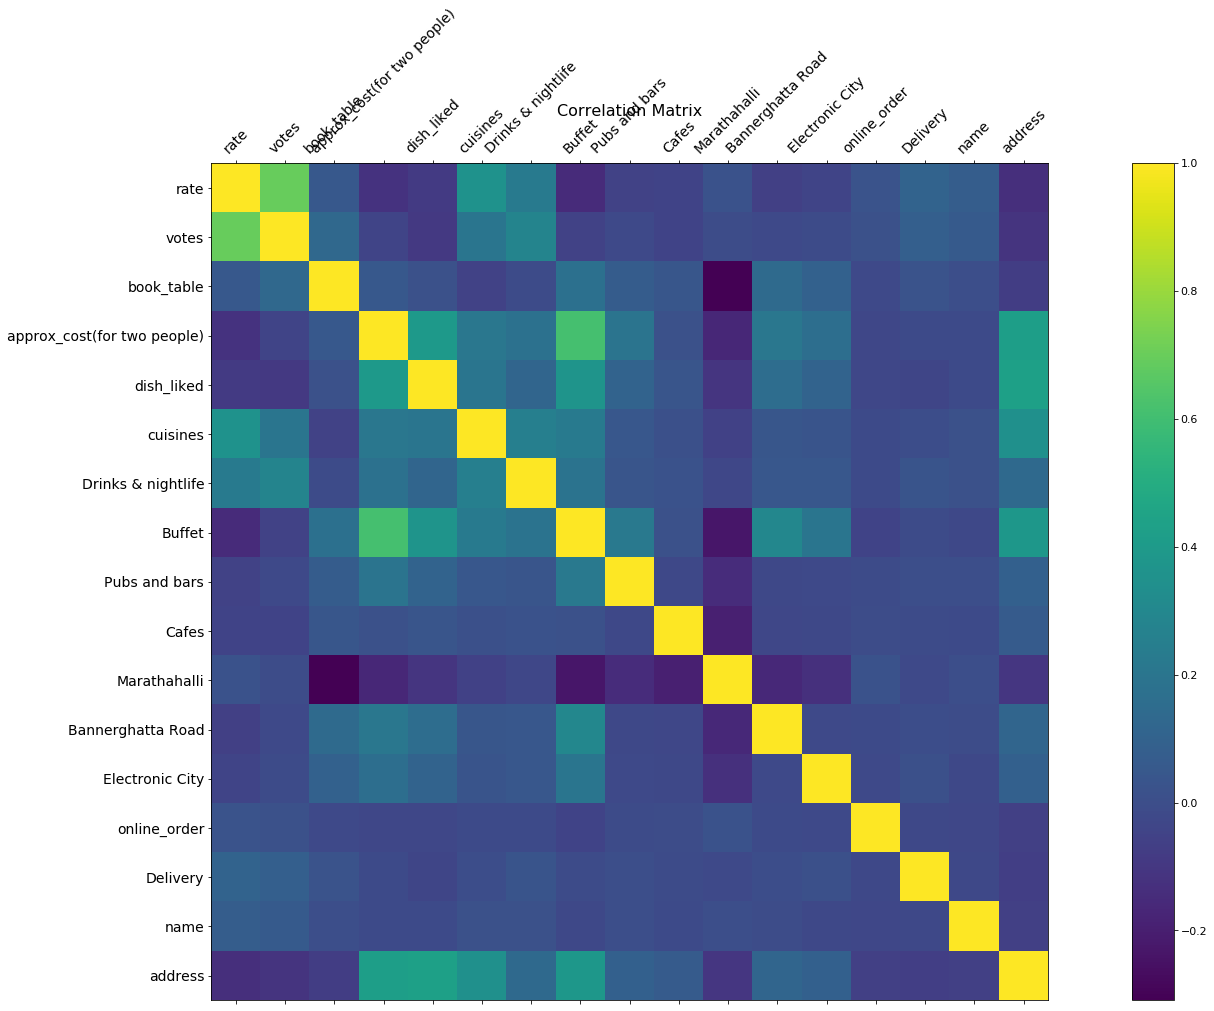

In [39]:
f = plt.figure(figsize=(30, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(17), columns_to_keep, fontsize=14, rotation=45)
plt.yticks(range(17), columns_to_keep, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)
plt.title('Correlation Matrix', fontsize=16);

## Modellek elért eredményeinek táblázata

Látható, hogy a RandomForestRegressor éri el konzekvensen a legjobb eredményt, s tizedekkel bár, de a nem purgált dataset-en való, standard skálázást használó verziója a legjobb.

In [40]:
statistic_table

,details,mean,name,purging,rmse,standard deviation
0,MinMaxNorm with Basic Data,0.346039,LinearRegression,No,3.460392e-01,NaN
1,MinMaxNorm with Basic Data,0.193449,DecisionTreeRegressor,No,5.488615e-16,0.00828624
2,MinMaxNorm with Basic Data,0.162651,RandomForestRegressor,No,6.653498e-02,0.00377675
3,StandardScaler with Basic Data,0.346043,LinearRegression,No,3.460433e-01,NaN
4,StandardScaler with Basic Data,0.192474,DecisionTreeRegressor,No,5.489375e-16,0.00689772
5,StandardScaler with Basic Data,0.163528,RandomForestRegressor,No,6.687184e-02,0.00322227
6,MinMaxNorm with Purged Data,0.343039,LinearRegression,Yes,3.430386e-01,NaN
7,MinMaxNorm with Purged Data,0.208337,DecisionTreeRegressor,Yes,5.481607e-16,0.0132816
8,MinMaxNorm with Purged Data,0.174284,RandomForestRegressor,Yes,6.935790e-02,0.00724392
9,StandardScaler with Purged Data,0.343039,LinearRegression,Yes,3.430386e-01,NaN


## Legjobb hiperparaméterek keresése a legjobb eddigi modellhez (Basic Dataset)

RandomForestRegressor modellhez hiperparaméterek keresése GridSearchCV class segítségével:

In [41]:
param_grid = [
     {'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]},
 ]
forest_reg = RandomForestRegressor(n_jobs = -1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(train_set_ready_with_standard_scaler, train_labels)

/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/jobli

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [42]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [43]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

0.2709159343303587 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.2603433973122144 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.25905331490337874 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
0.21859261306551486 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.21037489058899023 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.21073685092460845 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.16235923241915137 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.15925957262295662 {'bootstrap': False, 'max_features': 10, 'n_estimators': 15}
0.15488933902531207 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
min:  0.15488933902531207


RandomForestRegressor modellhez hiperparaméterek keresése RandomSearchCV class segítségével:

(mivel sokáig fut, és mindig azonos eredményt ért el, mint a gridSerachCV, így kikommenteztük)

In [44]:
#from sklearn.model_selection import RandomizedSearchCV
#forest_reg = RandomForestRegressor()
#from scipy.stats import randint as sp_randint
#param_dist = {
 #             "max_features": sp_randint(2, 45),
  #            "bootstrap": [True, False],
  #            'n_estimators': sp_randint(3, 10)}
#n_iter_search = 10
#rand_search = RandomizedSearchCV(forest_reg,param_distributions=param_dist, n_iter=n_iter_search, cv=10, scoring='neg_mean_squared_error')
#rand_search.fit(train_set_ready_with_minmax, train_labels)


## Csak a vizualizáció kedvéért újra lefuttatás

A legjobb becslő (modell + hiperparaméterek) által tippelt és a valós rate értékek közötti átlagos hiba ábrázolása.

In [45]:
best_predictions = grid_search.best_estimator_.predict(train_set_ready_with_standard_scaler)
abs_error_array = abs(best_predictions - train_labels)

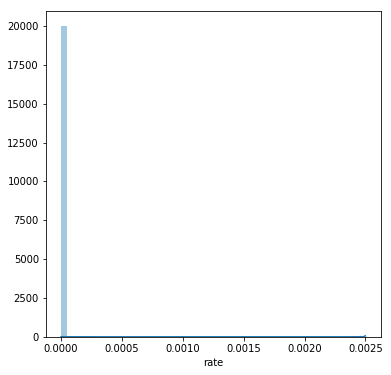

In [46]:
plt.figure(figsize=(6,6))
sns.distplot(abs_error_array)
plt.show()

A legjobb becslő által, cross validation során elért rmse-átlagértékek ábrázolva:

In [47]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, train_set_ready_with_standard_scaler, train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)

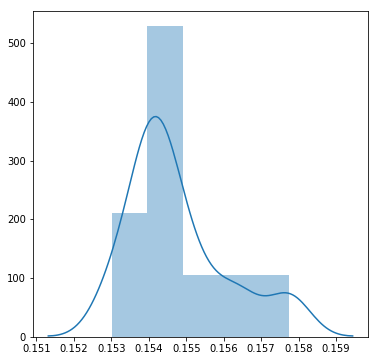

In [48]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

## Az egyes attribútumok 'fontossága' a predikcióban

A legjobb becslő által fontosnak gondolt feature-ök elemzése

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2787687226018413, 'votes'),
 (0.1803600339650297, 'dish_liked'),
 (0.10054680383683681, 'approx_cost(for two people)'),
 (0.09664746085255668, 'name'),
 (0.0954095390235746, 'cuisines'),
 (0.09340221318728617, 'address'),
 (0.05138873472271173, 'book_table'),
 (0.013746529311209104, 'online_order'),
 (0.007029719705856793, 'Desserts'),
 (0.005771651562609827, 'Marathahalli'),
 (0.004352430625368343, 'Delivery'),
 (0.00423043273525772, 'Electronic City'),
 (0.0040743301777773095, 'Brookefield'),
 (0.0038728703042587866, 'Indiranagar'),
 (0.0038316418779467598, 'Whitefield'),
 (0.0038268744462421123, 'Dine-out'),
 (0.0034564114589388808, 'Sarjapur Road'),
 (0.003167661040368671, 'Old Airport Road'),
 (0.003109575674757166, 'Bellandur'),
 (0.0029838334084174296, 'Bannerghatta Road'),
 (0.0028950451390106473, 'HSR'),
 (0.0024509285308654924, 'JP Nagar'),
 (0.002446459815903481, 'Drinks & nightlife'),
 (0.002316088329274321, 'Rajajinagar'),
 (0.002282384059604429, 'Kammanahalli'),
 (0.0

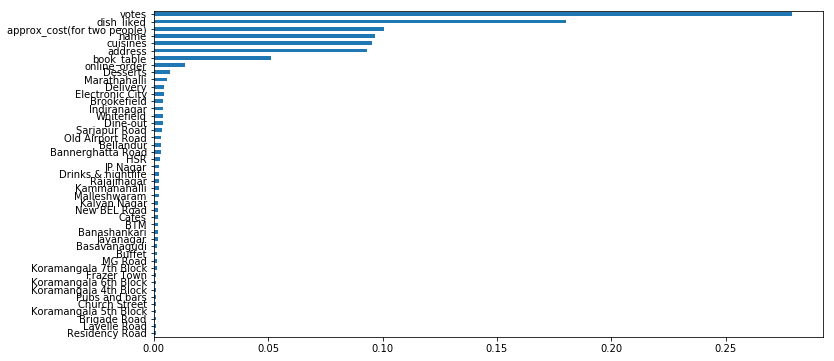

In [50]:
plot_importances(grid_search.best_estimator_, attributes)

## Végül a teszt szetten futtatás, mérés (Basic dataset)

In [51]:
final_model = grid_search.best_estimator_

X_test = runPipeline(test_set, False, standardScaler)
y_test = test_labels

In [52]:
print(len(y_test))
X_test_df = pd.DataFrame(X_test)
final_predictions = final_model.predict(X_test_df)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Basic Data", final_rmse)

8572
Scores: 0.32105887336020233
Mean: 0.32105887336020233
Standard deviation: 0.0




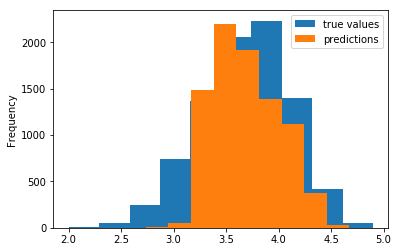

In [53]:
y_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## Model vizsgálata, mi alapján dönt a döntési fa

In [54]:
def convert_dot_to_png(model, max_depth=5, feature_names=list(attributes)):
    export_graphviz(model.estimators_[0], out_file='tree.dot', max_depth=max_depth, feature_names=feature_names, rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')

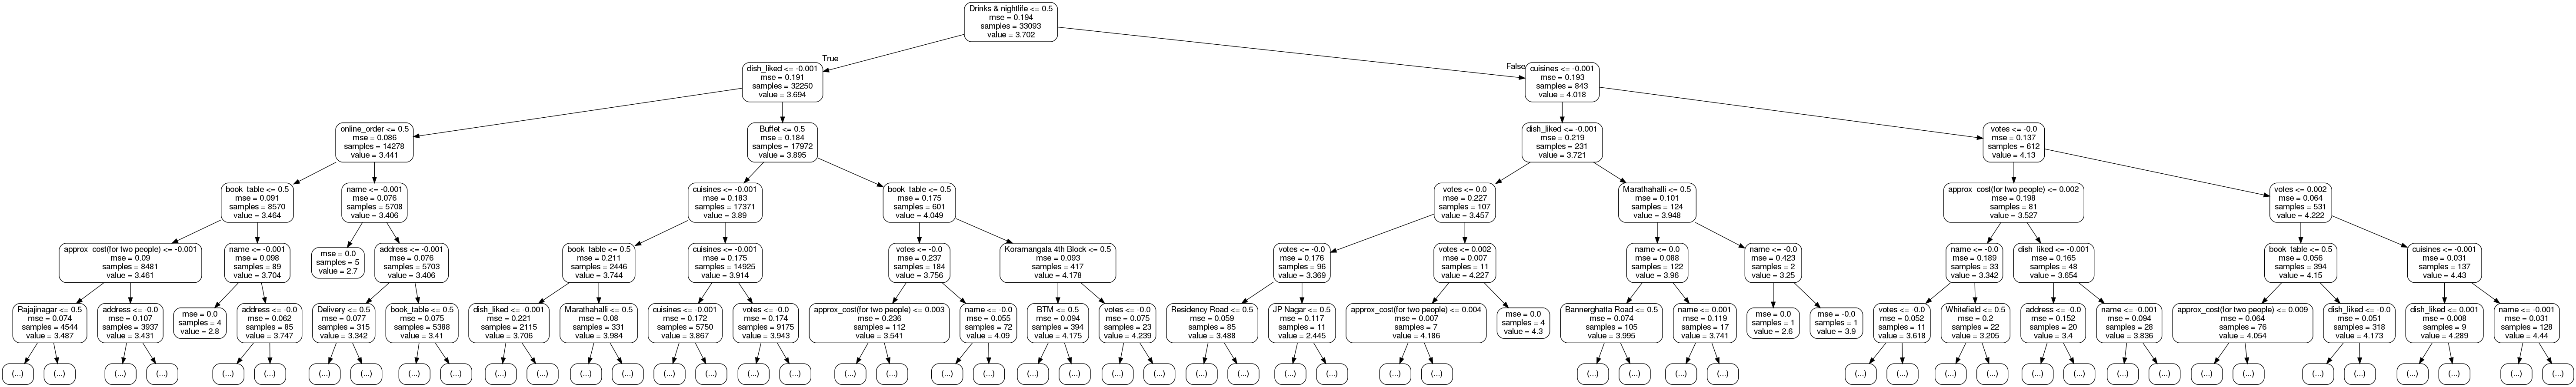

In [55]:
convert_dot_to_png(final_model)
Image('tree.png')

## Lokáció (GPS koordináták) hozzáadása

Geopy segítségével a lokációk koordiánátinak lekérése.

In [56]:
def get_lat_lon(df):
    locations=pd.DataFrame({"Name":zomato['location'].unique()})
    locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
    lat=[]
    lon=[]
    geolocator=Nominatim(user_agent="app")
    for location in locations['Name']:
        location = geolocator.geocode(location)
        if location is None:
            lat.append(np.nan)
            lon.append(np.nan)
        else:    
            lat.append(location.latitude)
            lon.append(location.longitude)
    locations['lat']=lat
    locations['lon']=lon
    return locations

In [57]:
zomato_loc = backup_zomato.copy()
locations=pd.DataFrame({"Name":zomato_loc['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

locations['geo_loc']=lat_lon

In [58]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

,Name,geo_loc
0,Bannerghatta Road,"(12.9166588, 77.5998415)"
1,MG Road,"(12.9741854, 77.6124135)"
2,Jayanagar,"(12.9292731, 77.5824229)"
3,Marathahalli,"(12.9552572, 77.6984163)"
4,Electronic City,"(12.9791198, 77.5912997)"


In [59]:
Rest_locations=pd.DataFrame(zomato_loc['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

5124

In [60]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [61]:
basemap

A helyek összepárosítása a gps koordinátákkal.

In [62]:
loc_dict = dict(zip(zomato_loc['location'].unique(), locations['geo_loc']))
loc_array = list()
for x in zomato_loc['location']:
    loc_array.append(loc_dict[x])

NaN értékek lecserélése (-1, -1)-ekre a gps koordinátáknál.

In [63]:
nan_free_loc_array = []
for x in loc_array:
    if(x != x):
        nan_free_loc_array.append((-1, -1))
    else:
        nan_free_loc_array.append(x)

## Új dataset létrehozása (Lat Lon dataset), azon szokásos feldolgozás elvégzése

In [64]:
extended_dataset = zomato.copy()
cleaned_rate_labels = []

list_of_lat = [x[0] for x in nan_free_loc_array]
list_of_lon = [x[1] for x in nan_free_loc_array]

extended_dataset['lat'] = list_of_lat
extended_dataset['lon'] = list_of_lon

extended_dataset = extended_dataset.loc[extended_dataset['rate'] !='NEW']
extended_dataset = extended_dataset.loc[extended_dataset['rate'] !='-'].reset_index(drop=True)

for n in extended_dataset['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
extended_dataset['rate'] = cleaned_rate_labels
extended_dataset = extended_dataset.drop(extended_dataset[np.isnan(extended_dataset['rate'])].index)

extended_dataset = extended_dataset.reset_index()

extended_train_set, extended_test_set = split_train_test_by_id(extended_dataset, 0.2, "index")

extended_train_labels = extended_train_set['rate']
extended_train_set = extended_train_set.drop('index', axis=1)
extended_test_labels = extended_test_set['rate']
extended_test_set = extended_test_set.drop('index', axis=1)

Az új attribútumok skálázása külön, hiszen ez előtt meghívva nem léteznek még, így a függvényben nem kivitelezhető.

Skálázatlan oszlopok kimentése a későbbi vizualizációra való felhasználásra.

In [65]:
not_scaled_extended_train_set = pd.DataFrame()
not_scaled_extended_train_set['lat'] = extended_train_set['lat']
not_scaled_extended_train_set['lon'] = extended_train_set['lon']

extended_train_set['lat'] = standardScaler(extended_train_set['lat'], "lat", True)
extended_train_set['lon'] = standardScaler(extended_train_set['lon'], "lon", True)

extended_test_set['lat'] = standardScaler(extended_test_set['lat'], "lat", False)
extended_test_set['lon'] = standardScaler(extended_test_set['lon'], "lon", False)


A nem új feature-ökhöz tartozó adat végigfuttatása a Pipeline-on, majd modellek kpróbálása, feldolgozott dataset elmentése (extended_train_set_ready_with_standard_scaler).

In [66]:
trainDataWithGivenScalerAndRunAllModels(extended_train_set, extended_train_labels,  standardScaler, "StandardScaler with Lat Lon Data", "No")

Linear Regression with StandardScaler with Lat Lon Data
Predictions:	 [3.53286011 3.69657945 4.2340747  3.81331894 3.75222818]
Labels:		    rate
0   2.8
1   4.1
2   4.1
3   3.9
6   4.0


Decision Tree with StandardScaler with Lat Lon Data
Scores: [0.1873975  0.18467739 0.18941793 0.17449145 0.19248498 0.19043301
 0.17924154 0.19299457 0.18095312 0.19896225]
Mean: 0.18710537576026803
Standard deviation: 0.006967144902124597


Random forest with StandardScaler with Lat Lon Data
Scores: [0.15412613 0.15414749 0.15374244 0.15756812 0.16045512 0.15365124
 0.15586577 0.15473547 0.15077938 0.16122491]
Mean: 0.15562960638144085
Standard deviation: 0.00307673904775063




In [67]:
extended_train_set_ready_with_standard_scaler = runPipeline(extended_train_set, True, standardScaler)

## GridSearch Cross Validation lefuttatása (Lat Lon dataset)

In [68]:
grid_search.fit(extended_train_set_ready_with_standard_scaler, extended_train_labels)

/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

0.24136979693338745 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.23643106933316368 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.23601919598346038 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
0.19183544773694586 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.18579962921487347 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.18384634698932165 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.14700184625920198 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.1411438270863789 {'bootstrap': False, 'max_features': 10, 'n_estimators': 15}
0.13797825817149295 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
min:  0.13797825817149295


## A legjobb becslő általi eredmények megjelenítése (Lat Lon dataset)

In [70]:
best_predictions = grid_search.best_estimator_.predict(extended_train_set_ready_with_standard_scaler)

In [71]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, extended_train_set_ready_with_standard_scaler, extended_train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)
best_estimator_scores

array([0.13542665, 0.13973081, 0.13368157, 0.13165422, 0.14068772,
       0.13779123, 0.14032229, 0.13803482, 0.13644055, 0.14546551])

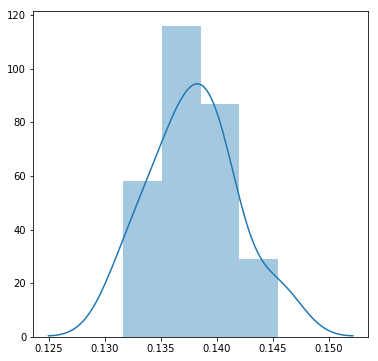

In [72]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

In [73]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'lat', 'lot'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2787687226018413, 'votes'),
 (0.1803600339650297, 'dish_liked'),
 (0.10054680383683681, 'approx_cost(for two people)'),
 (0.09664746085255668, 'name'),
 (0.0954095390235746, 'cuisines'),
 (0.09340221318728617, 'address'),
 (0.05138873472271173, 'book_table'),
 (0.013746529311209104, 'online_order'),
 (0.007029719705856793, 'Cafes'),
 (0.005771651562609827, 'MG Road'),
 (0.004352430625368343, 'Buffet'),
 (0.00423043273525772, 'Brookefield'),
 (0.0040743301777773095, 'Bellandur'),
 (0.0038728703042587866, 'Frazer Town'),
 (0.0038316418779467598, 'Residency Road'),
 (0.0038268744462421123, 'Delivery'),
 (0.0034564114589388808, 'Rajajinagar'),
 (0.003167661040368671, 'Marathahalli'),
 (0.003109575674757166, 'Bannerghatta Road'),
 (0.0029838334084174296, 'BTM'),
 (0.0028950451390106473, 'Electronic City'),
 (0.0024509285308654924, 'HSR'),
 (0.002446459815903481, 'Desserts'),
 (0.002316088329274321, 'New BEL Road'),
 (0.002282384059604429, 'Jayanagar'),
 (0.0022578797437977907, 'Lavelle 

## Teszt lefuttatása végül, eredmény kijelzése (Lat Lon dataset)

8572
Scores: 0.3204090927250452
Mean: 0.3204090927250452
Standard deviation: 0.0




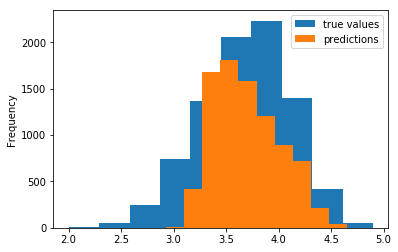

In [74]:
final_model = grid_search.best_estimator_

X_extended_test = runPipeline(extended_test_set, False, standardScaler)
y_extended_test = extended_test_labels
print(len(y_test))
X_extended_test_df = pd.DataFrame(X_extended_test)
final_predictions = final_model.predict(X_extended_test_df)
final_mse = mean_squared_error(y_extended_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Lat Lon Data", final_rmse)
y_extended_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## K-Means klaszterezéssel GPS koordináták csoportokba sorolása

Az előbb elmentett "extended_train_set" felhasználása, belőle a 'lat' és a 'lon' feature-ök kinyerése

In [75]:
coord_cols_train_df = pd.DataFrame()
coord_cols_train_df['lat'] = extended_train_set['lat']
coord_cols_train_df['lon'] = extended_train_set['lon']

In [76]:
coord_cols_train = np.array(coord_cols_train_df)

### Klaszterezés lefuttatása

In [77]:
km = KMeans()
y_km = km.fit_predict(coord_cols_train)

### Klaszterezés megjelenítése koordináták alapján

In [78]:
coord_cols_df = pd.DataFrame()
coord_cols_df['lat'] = not_scaled_extended_train_set['lat']
coord_cols_df['lon'] = not_scaled_extended_train_set['lon']
coord_cols_ = np.array(coord_cols_df)

Kiszedjük a -1-es sorokat, hogy meg tudjuk állapítani a legkisebb értékeket, amikkel körbehatárolhatjuk a térképet a vizualizációnál.

In [79]:
coord_cols_del = [x for x in coord_cols_ if x[0] != -1.0] 

In [80]:
lower_lat = min(coord_cols_del, key = lambda t: t[1])[1] 
lower_lon = min(coord_cols_del, key = lambda t: t[0])[0]
upper_lat = max(coord_cols_del, key = lambda t: t[1])[1]
upper_lon = max(coord_cols_del, key = lambda t: t[0])[0]

In [81]:
print(lower_lat)
print(lower_lon)
print(upper_lat)
print(upper_lon)

77.4333346
12.9055682
77.7519261
13.3457317


Kiszedjük az egyedi értékeket (először tuple formába konvertáljuk, hogy megmaradjanak az adatkettesek), a hozzájuk tartozó "zónákkal" párban.

In [82]:
tuple_coords = []
for x in coord_cols_:
    tuple_coords.append((x[0], x[1]))
unique_tuple_coords = np.unique(tuple_coords, return_index = True, axis = 0)   
unique_y_km = []
for x in unique_tuple_coords[1]:
    unique_y_km.append(y_km[x])

Kiíratjuk, mely zónába hány, egyedi koordináátkkal rendelkező étterem van (ennyi pontunk lesz)

In [83]:
Counter(unique_y_km)

Counter({1: 1, 4: 9, 6: 11, 2: 9, 5: 26, 3: 11, 7: 9, 0: 2})

Kirajzoltatjuk az egyedi koordinátákat (hiszen nem lehet/ nincs értelme ugyanazt a pontot többször), különböző zónákat különböző színnel. Itt viszont az eredeti koordinátákat kell felhasználnunk, hiszen a skálázott értékekkel nem lehet jól vizualizálni.

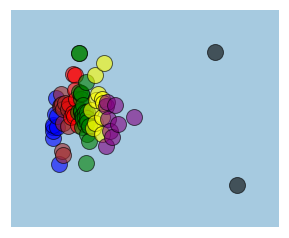

In [84]:
m=Basemap(llcrnrlon = lower_lon - 0.1, llcrnrlat = lower_lat - 0.1, urcrnrlon = upper_lon + 0.1 , urcrnrlat = upper_lat + 0.1)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

for coord, zona in zip(unique_tuple_coords[0], unique_y_km):
    if zona == 0:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="black", markeredgecolor="black", markeredgewidth=1)
    if zona == 1:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
    if zona == 2:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="red", markeredgecolor="black", markeredgewidth=1)
    if zona == 3:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="yellow", markeredgecolor="black", markeredgewidth=1)
    if zona == 4:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="blue", markeredgecolor="black", markeredgewidth=1)
    if zona == 5:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="green", markeredgecolor="black", markeredgewidth=1)
    if zona == 6:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="brown", markeredgecolor="black", markeredgewidth=1)
    if zona == 7:
        m.plot(coord[0], coord[1], linestyle='none', marker="o", markersize=16, alpha=0.6, c="purple", markeredgecolor="black", markeredgewidth=1)
        

## Új dataset létrehozása  (Zones dataset), azon szokásos feldolgozás elvégzése

In [85]:
dataset_with_zones = zomato.copy()
cleaned_rate_labels = []

dataset_with_zones = dataset_with_zones.loc[dataset_with_zones['rate'] !='NEW']
dataset_with_zones = dataset_with_zones.loc[dataset_with_zones['rate'] !='-'].reset_index(drop=True)

for n in dataset_with_zones['rate']:
    cleaned_rate_labels.append(float(cleanRates(n)))
dataset_with_zones['rate'] = cleaned_rate_labels
dataset_with_zones = dataset_with_zones.drop(dataset_with_zones[np.isnan(dataset_with_zones['rate'])].index)

dataset_with_zones = dataset_with_zones.reset_index()

zones_train_set, zones_test_set = split_train_test_by_id(dataset_with_zones, 0.2, "index")

zones_train_labels = zones_train_set['rate']
zones_train_set = zones_train_set.drop('index', axis=1)
zones_train_set['zone'] = y_km
zones_test_labels = zones_test_set['rate']
zones_test_set = zones_test_set.drop('index', axis=1)

In [86]:
trainDataWithGivenScalerAndRunAllModels(zones_train_set, zones_train_labels,  standardScaler, "StandardScaler with Zones Data", "No")

Linear Regression with StandardScaler with Zones Data
Predictions:	 [3.53182366 3.68603288 4.24192842 3.80755583 3.73402334]
Labels:		    rate
0   2.8
1   4.1
2   4.1
3   3.9
6   4.0


Decision Tree with StandardScaler with Zones Data
Scores: [0.19409718 0.18675153 0.1758106  0.18468075 0.19033777 0.18377855
 0.18209353 0.19822421 0.18009936 0.21017485]
Mean: 0.18860483315516147
Standard deviation: 0.00954738521018629


Random forest with StandardScaler with Zones Data
Scores: [0.15580189 0.16230868 0.15045781 0.15766082 0.15503984 0.15355926
 0.15568292 0.15992075 0.15422213 0.16713214]
Mean: 0.15717862548978867
Standard deviation: 0.00457010475067235




Az adatok végigfuttatása a Pipeline-on, feldolgozott dataset elmentése (zones_train_set_ready_with_standard_scaler).

In [87]:
zones_train_set_ready_with_standard_scaler = runPipeline(zones_train_set, True, standardScaler)

## GridSearch Cross Validation lefuttatása (Zones dataset)

In [88]:
grid_search.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)

/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/markerer/anaconda3/lib/python3.7/site-packages/sklearn/externals/jobli

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'bootstrap': [False], 'n_estimators': [10, 15, 20], 'max_features': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [89]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('min: ', np.sqrt(-cvres["mean_test_score"].max()))

0.25591862615795885 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.24869750230033388 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.2457771611565841 {'bootstrap': False, 'max_features': 3, 'n_estimators': 20}
0.210360269307997 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
0.2026386042499115 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.19666179253412217 {'bootstrap': False, 'max_features': 5, 'n_estimators': 20}
0.15331497597275387 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
0.14863593071873862 {'bootstrap': False, 'max_features': 10, 'n_estimators': 15}
0.14607643234794668 {'bootstrap': False, 'max_features': 10, 'n_estimators': 20}
min:  0.14607643234794668


## A legjobb becslő általi eredmények megjelenítése (Zones dataset)

In [90]:
best_predictions = grid_search.best_estimator_.predict(zones_train_set_ready_with_standard_scaler)

In [91]:
best_estimator_scores_ = cross_val_score(grid_search.best_estimator_, zones_train_set_ready_with_standard_scaler, zones_train_labels, scoring="neg_mean_squared_error", cv=10)
best_estimator_scores = np.sqrt(-best_estimator_scores_)
best_estimator_scores

array([0.15153783, 0.15212654, 0.13994197, 0.14403746, 0.14925163,
       0.14178758, 0.14932643, 0.14554962, 0.1432024 , 0.15318829])

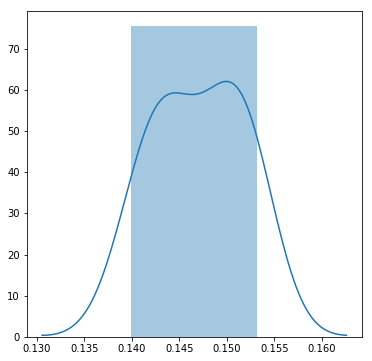

In [92]:
plt.figure(figsize=(6,6))
sns.distplot(best_estimator_scores)
plt.show()

In [93]:
attributes = ['address', 'name', 'online_order', 'book_table', 'votes', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'zones'] + type_labels + city_labels
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2787687226018413, 'votes'),
 (0.1803600339650297, 'dish_liked'),
 (0.10054680383683681, 'approx_cost(for two people)'),
 (0.09664746085255668, 'name'),
 (0.0954095390235746, 'cuisines'),
 (0.09340221318728617, 'address'),
 (0.05138873472271173, 'book_table'),
 (0.013746529311209104, 'online_order'),
 (0.007029719705856793, 'Delivery'),
 (0.005771651562609827, 'Malleshwaram'),
 (0.004352430625368343, 'Cafes'),
 (0.00423043273525772, 'Church Street'),
 (0.0040743301777773095, 'Brigade Road'),
 (0.0038728703042587866, 'HSR'),
 (0.0038316418779467598, 'Sarjapur Road'),
 (0.0038268744462421123, 'Desserts'),
 (0.0034564114589388808, 'Residency Road'),
 (0.003167661040368671, 'New BEL Road'),
 (0.003109575674757166, 'Basavanagudi'),
 (0.0029838334084174296, 'Banashankari'),
 (0.0028950451390106473, 'Frazer Town'),
 (0.0024509285308654924, 'Indiranagar'),
 (0.002446459815903481, 'Dine-out'),
 (0.002316088329274321, 'Old Airport Road'),
 (0.002282384059604429, 'Kalyan Nagar'),
 (0.002257879

## Test set-hez zónák predikciója KNN algo-val

In [94]:
X_loc = coord_cols_train.copy()
y_loc = y_km.copy()

Először a train szettet is szétszedjük és azon betanítjuk a K Nearest Neighbors klaszterezésre használt modellt, majd ellenőrizzük is helyes működését.

In [95]:
X_loc_train, X_loc_test, y_loc_train, y_loc_test = train_test_split(X_loc, y_loc, test_size=0.20) 

In [96]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_loc_train, y_loc_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [97]:
y_pred = classifier.predict(X_loc_test)  

Amint látni, 100%-ig egyeznek a prediktált értékek. Így feltételezhetjük, hogy a test set adatsoraihoz is helyesen fogja megjósolni a zónákat

In [98]:
print(confusion_matrix(y_loc_test, y_pred))  
print(classification_report(y_loc_test, y_pred)) 

[[ 761    0    0    0    0    0    0    0]
 [   0  131    0    0    0    0    0    0]
 [   0    0  539    0    0    0    0    0]
 [   0    0    0  546    0    0    0    0]
 [   0    0    0    0 1559    0    0    0]
 [   0    0    0    0    0 2036    0    0]
 [   0    0    0    0    0    0  828    0]
 [   0    0    0    0    0    0    0  219]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       761
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       539
           3       1.00      1.00      1.00       546
           4       1.00      1.00      1.00      1559
           5       1.00      1.00      1.00      2036
           6       1.00      1.00      1.00       828
           7       1.00      1.00      1.00       219

   micro avg       1.00      1.00      1.00      6619
   macro avg       1.00      1.00      1.00      6619
weighted avg       1.00      1.00      1.00      6619



A teszt szetten is megjósoljuk a kategóriákat és hozzáadjuk a teszt szetthez az oszlopot.

In [99]:
coord_cols_test_df = pd.DataFrame()
coord_cols_test_df['lat'] = extended_test_set['lat']
coord_cols_test_df['lon'] = extended_test_set['lon']
coord_cols_test = np.array(coord_cols_test_df)

y_test_pred = classifier.predict(coord_cols_test)  

In [100]:
zones_test_set['zones'] = y_test_pred

## Teszt lefuttatása végül, eredmény kijelzése (Zones dataset)

8572
Scores: 0.3195635119880247
Mean: 0.3195635119880247
Standard deviation: 0.0




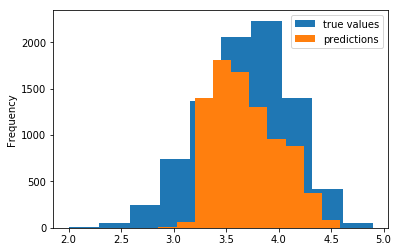

In [101]:
final_model = grid_search.best_estimator_

X_zones_test = runPipeline(zones_test_set, False, standardScaler)
y_zones_test = zones_test_labels
print(len(y_test))
X_zones_test_df = pd.DataFrame(X_zones_test)
final_predictions = final_model.predict(X_zones_test_df)
final_mse = mean_squared_error(y_zones_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)
printToTestStatistics("Test with Zones Data", final_rmse)
y_zones_test.plot(kind='hist', label='true values')
pd.Series(final_predictions).plot(kind='hist', label='predictions')
plt.legend()

## Elért eredmények újabb csekkolása

In [102]:
statistic_table.sort_values(by=['mean'])

,details,mean,name,purging,rmse,standard deviation
14,StandardScaler with Lat Lon Data,0.155630,RandomForestRegressor,No,6.273137e-02,0.00307674
17,StandardScaler with Zones Data,0.157179,RandomForestRegressor,No,6.517725e-02,0.0045701
2,MinMaxNorm with Basic Data,0.162651,RandomForestRegressor,No,6.653498e-02,0.00377675
5,StandardScaler with Basic Data,0.163528,RandomForestRegressor,No,6.687184e-02,0.00322227
8,MinMaxNorm with Purged Data,0.174284,RandomForestRegressor,Yes,6.935790e-02,0.00724392
11,StandardScaler with Purged Data,0.176521,RandomForestRegressor,Yes,7.280855e-02,0.00694155
13,StandardScaler with Lat Lon Data,0.187105,DecisionTreeRegressor,No,5.834247e-16,0.00696714
16,StandardScaler with Zones Data,0.188605,DecisionTreeRegressor,No,5.909755e-16,0.00954739
4,StandardScaler with Basic Data,0.192474,DecisionTreeRegressor,No,5.489375e-16,0.00689772
1,MinMaxNorm with Basic Data,0.193449,DecisionTreeRegressor,No,5.488615e-16,0.00828624


In [103]:
test_statistic_table.sort_values(by=['score'])

,name,score
2,Test with Zones Data,0.319564
1,Test with Lat Lon Data,0.320409
0,Test with Basic Data,0.321059


## Ensemble Methods

### BaggingRegressor

Megadható, hogy hány darab, és milyen modellt használjon. Minden modellt betanít a train set egy részét felhaználva, majd maga a modell kimenete az egyes modellek által jósolt eredményekból adódik. A kiválasztás menete lehetséges soft voting vagy hard voting alkalmazása által. 

Osztályzási problémák esetén a hard voting során a legtöbb szavaztot kapott oszály lesz az output, soft voting esetén pedig minden oszályhoz tartozik egy valószínűség (ha ilyet képesek mondani a modellek, amiket használ), és ezek közül a legnagyobb valószínűségű osztály nyer.

Regressziós feladat során lehet hard voting-ot alkalmazni, vagy a prediktált értékek mediánját/átlagát venni.

Az, hogy a train set mely részét használja fel, a bootstrap értékétől függ. Ha True, akkor bagging van, azaz lehetséges, hogy a random kiválasztott adatsorok között ugyanaz az adatsor többször is előfordul egy betanítandó mdellhez tartozó train subset-ben, míg ha False, akkor pasting van, azaz nem lehetséges többszörös előfordulása egy adatsornak egy subset-ben. Ettől függetlenül pasting során is kiveheti ugyanazt az adatsort több alkalommal a modell, de csak különböző modellekhez tartozó subsetek alkotása során.

In [104]:
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bag_reg.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
bag_reg_pred = bag_reg.predict(zones_train_set_ready_with_standard_scaler)
bag_reg_mse = mean_squared_error(zones_train_labels, bag_reg_pred)
bag_reg_mse = np.sqrt(bag_reg_mse)
print(bag_reg_mse)
print(bag_reg.oob_score_)


0.049548603270531226
0.9069409564293188


In [105]:
bag_reg_pred = bag_reg.predict(X_zones_test)
bag_reg_mse = mean_squared_error(y_zones_test, bag_reg_pred)
bag_reg_mse = np.sqrt(bag_reg_mse)
display_scores(bag_reg_mse)

printToTestStatistics("Bagging with Zones Data", bag_reg_mse)

Scores: 0.31579379641976746
Mean: 0.31579379641976746
Standard deviation: 0.0




## Ada boost

Megadható, milyen modellekből építezzen. n_estimator számú modellt hoz létre, melyek közül az elsőt egyszerűen betanítja az étteremadatok-label párossal úgy, hogy minden adatsor súlya egységnyi. Eztán a következő modellnél az adatsorok súlyai úgy frissülnek, hogy a nem eltalált adatsorok súlyai nőnek, azaz nagyobb hangsúlyt fektet a modell ezeknek az eltalálására.

Megpróbáljuk megtalálni a legjobb paramétereket (tanulási ráta, becslők száma)
(Amennyiben megadjuk az AdaBoost konstruktorában, hogy pl. DecisionTreeRegressor(max_depth=1)-et használjon, akkor az eredmény sokkal rosszabb lesz (0.333x --> 0.37x)

In [106]:
param_dist = {
 'n_estimators': [25, 50, 100],
 'learning_rate' : [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.037, 0.04, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=6,
 n_iter = 20,
 n_jobs=-1)

pre_gs_inst.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
print(pre_gs_inst.best_estimator_)
best_ada_reg = pre_gs_inst.best_estimator_
ada_reg_pred = best_ada_reg.predict(zones_train_set_ready_with_standard_scaler)
ada_reg_mse = mean_squared_error(zones_train_labels, ada_reg_pred)
ada_reg_mse = np.sqrt(ada_reg_mse)
print(ada_reg_mse)

AdaBoostRegressor(base_estimator=None, learning_rate=0.03, loss='exponential',
         n_estimators=50, random_state=None)
0.33265999506557276


In [107]:
#best_ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=50, learning_rate=0.2)
#best_ada_reg.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)

In [108]:
ada_reg_pred = best_ada_reg.predict(X_zones_test)
ada_reg_mse = mean_squared_error(y_zones_test, ada_reg_pred)
ada_reg_mse = np.sqrt(ada_reg_mse)
display_scores(ada_reg_mse)


printToTestStatistics("Adaptive boosting with Zones Data", ada_reg_mse)

Scores: 0.33348020735547396
Mean: 0.33348020735547396
Standard deviation: 0.0




## Gradiens boosting 

n_estimators számú DecisionTree-t hoz létre, mindegyiknél jelenleg egy döntést hoz(max_depth=2), és mindet sorban a előző hibáival tanítja be. Azaz, az első fa még a normális étteremadatok-label párost kapja be, a második fa viszont már az étterem adatai mellé nem a rate-értékeket, hanem az első fa által, rate tippelés közben okozott hibákat kapja be, és így tovább az összes fa során. Végül a modell predikciója az összes fa predikcijóinak összege.

Amennyiben a becslők számát felvesszük 100-200 fölé, akkor egyre inkább overfittelni fog (a tanító adatokon egyre jobb, miközben a teszten egyre rosszabb eredményekkel szolgál). 

Lásd Hands-o-Machine Learning könyv 211. és 212. oldal ábrák.

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

gradboost_zones_train, gradboost_zones_val, gradboost_zones_train_labels, gradboost_zones_val_labels = train_test_split(zones_train_set_ready_with_standard_scaler, zones_train_labels)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100)
gbrt.fit(gradboost_zones_train, gradboost_zones_train_labels)
    
errors = [mean_squared_error(gradboost_zones_val_labels, y_pred) 
          for y_pred in gbrt.staged_predict(gradboost_zones_val)]
bst_n_estimators = np.argmin(errors)
print(bst_n_estimators)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(gradboost_zones_train, gradboost_zones_train_labels)
gbrt_best_pred = gbrt_best.predict(gradboost_zones_train)
gbrt_best_mse = mean_squared_error(gradboost_zones_train_labels, gbrt_best_pred)
gbrt_best_mse = np.sqrt(gbrt_best_mse)
gbrt_best_mse

99


0.31347283186094266

In [110]:
gbrt_best_pred = gbrt_best.predict(X_zones_test)
gbrt_best_mse = mean_squared_error(y_zones_test, gbrt_best_pred)
gbrt_best_mse = np.sqrt(gbrt_best_mse)
display_scores(gbrt_best_mse)

printToTestStatistics("Gradient boosting with Zones Data", gbrt_best_mse)

Scores: 0.3232368817287796
Mean: 0.3232368817287796
Standard deviation: 0.0




## Gradiens boosting korai megállítással

Itt addig megyünk, amíg javulást észlelünk a jóslatokon, amennyiben azonban egyre nagyobb hibát vét, akkor leállítjuk idő előtt, ezzel sok felesleges számítást megspórolva.

In [111]:
stopped_gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    stopped_gbrt.n_estimators = n_estimators
    stopped_gbrt.fit(zones_train_set_ready_with_standard_scaler, zones_train_labels)
    y_pred = stopped_gbrt.predict(X_zones_test)
    val_error = mean_squared_error(zones_test_labels, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 4:
            break # early stopping

In [112]:
print("Number of estimators at the stop:", stopped_gbrt.n_estimators)
final_predictions = stopped_gbrt.predict(X_zones_test)
final_mse = mean_squared_error(y_zones_test, final_predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)

printToTestStatistics("Early stopped gradient boosting with Zones Data", final_rmse)

Number of estimators at the stop: 113
Scores: 0.3227359215027199
Mean: 0.3227359215027199
Standard deviation: 0.0




## Stacking

Az egyszerűség kedvéért csak 2 szintű stacking modelt raktunk össze. A 0. szinten vannak a random forest, az extra (extremely random) trees, ada boost és gradient boosting modellek, az 1. szinten pedig a logisztikai regresszió.

Mindezt a zónákkal bővített adatszetten vizsgáljuk meg.



In [113]:
# Some useful parameters which will come in handy later on
ntrain = zones_train_set_ready_with_standard_scaler.shape[0]
ntest = X_zones_test.shape[0]
SEED = 0 # for reproducibilitytion
NFOLDS = 4 # set folds for out-of-fold predic
kf = KFold(n_splits= NFOLDS, random_state=SEED)

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

In [114]:
def get_oof(regressor, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        regressor.train(x_tr, y_tr)

        oof_train[test_index] = regressor.predict(x_te)
        oof_test_skf[i, :] = regressor.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [115]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 200,
    'max_depth': 6
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':200,
    'max_depth': 8
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 120,
    'learning_rate' : 0.05
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 120,
    'max_depth': 2
}

In [116]:
# Create 4 objects that represent our 3 models
rf = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostRegressor, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingRegressor, seed=SEED, params=gb_params)

In [117]:
# Create our OOF train and test predictions. These base results will be used as new features
stacking_zones_train_labels = zones_train_labels.reset_index(drop = True)

# Class to extend XGboost classifer
et_oof_train, et_oof_test = get_oof(et, zones_train_set_ready_with_standard_scaler,  stacking_zones_train_labels, X_zones_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf, zones_train_set_ready_with_standard_scaler,  stacking_zones_train_labels, X_zones_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, zones_train_set_ready_with_standard_scaler, stacking_zones_train_labels, X_zones_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb, zones_train_set_ready_with_standard_scaler, stacking_zones_train_labels, X_zones_test) # Gradient Boost

print("Training is complete")

Training is complete


In [118]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,3.429421,3.561389,3.468048,3.393524
1,3.686560,3.622074,3.465678,3.601929
2,4.280508,4.218529,4.360133,4.031501
3,3.815329,3.868560,3.595876,3.770720
4,3.765480,3.769123,4.192744,3.774361


In [119]:
stacking_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train), axis=1)
stacking_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test), axis=1)

In [120]:
gbm = xgb.XGBRegressor().fit(stacking_train, zones_train_labels)
predictions = gbm.predict(stacking_test)

[23:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/markerer/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/markerer/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [121]:
final_mse = mean_squared_error(y_zones_test, predictions)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)

printToTestStatistics("Stacking with Zones Data", final_rmse)

Scores: 0.31940456817339447
Mean: 0.31940456817339447
Standard deviation: 0.0




In [122]:
test_statistic_table.sort_values(by=['score'])

,name,score
3,Bagging with Zones Data,0.315794
7,Stacking with Zones Data,0.319405
2,Test with Zones Data,0.319564
1,Test with Lat Lon Data,0.320409
0,Test with Basic Data,0.321059
6,Early stopped gradient boosting with Zones Data,0.322736
5,Gradient boosting with Zones Data,0.323237
4,Adaptive boosting with Zones Data,0.333480
